In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

import sklearn         
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



In [118]:
#importing and transposing data files
file_arr = glob.glob('data/*.csv')

x = []
for i in file_arr:
    a = pd.read_csv(i,header=None).transpose()
    a = a[1:]
    x.append(a)

df = pd.concat(x).reset_index(drop=True)
df.columns = ['Date', 'Cold_Water_Temperature', 'Outdoor_Temperature', 'Delta_Temp_S', 'Delta_Temp_D', 'Cold_Water_Delta_Temp', 
              'Water_Flow_Fan', 'Power_On_Total', 'Water_Valve_Total', 'Room_Temp']


#dropping null values & date column
df.dropna(how='any',inplace=True)
df = df[['Cold_Water_Temperature', 'Outdoor_Temperature', 'Delta_Temp_S', 'Delta_Temp_D', 'Cold_Water_Delta_Temp', 
              'Water_Flow_Fan', 'Power_On_Total', 'Water_Valve_Total', 'Room_Temp']]

#coverting all datavalue to float type
for i in df.columns:
    df[i] = df[i].astype(float)

df = df[df['Cold_Water_Temperature'].astype(float) <= 13] 
df = df[df['Delta_Temp_D'].astype(float) > 3.1]
df = df[df['Cold_Water_Delta_Temp'].astype(float) <= 0.9]

In [120]:
X = df[['Cold_Water_Temperature', 'Outdoor_Temperature', 'Delta_Temp_S','Delta_Temp_D', 'Cold_Water_Delta_Temp', 
              'Power_On_Total', 'Water_Valve_Total', 'Room_Temp']].values

Y = df['Water_Flow_Fan'].values
train_size = 0.8

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=train_size, random_state=42)

In [121]:
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)
y_pred_test = model.predict(X_test)

model.score(X_test, Y_test)


0.8268642488176168

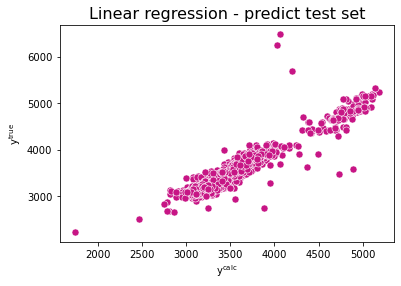

In [98]:
sns.scatterplot(x=y_pred_test, y=Y_test, color="mediumvioletred", s=50)

plt.title("Linear regression - predict test set", fontsize=16)
plt.xlabel("y$^{\sf calc}$")
plt.ylabel("y$^{\sf true}$")
plt.show()